In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.losses import binary_crossentropy
from keras.layers import Dense , Activation, Dropout , Flatten
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# read data

In [79]:
data = pd.read_csv("/content/Heart.csv")

In [80]:
data = data.iloc[: , 1:] #read all row but ignore first col

In [81]:
data.head(8)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
7,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No


# Describe Data

In [82]:
data.shape

(303, 14)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [84]:
data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


# Find Null Value And Deal With It

In [85]:
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

<Axes: >

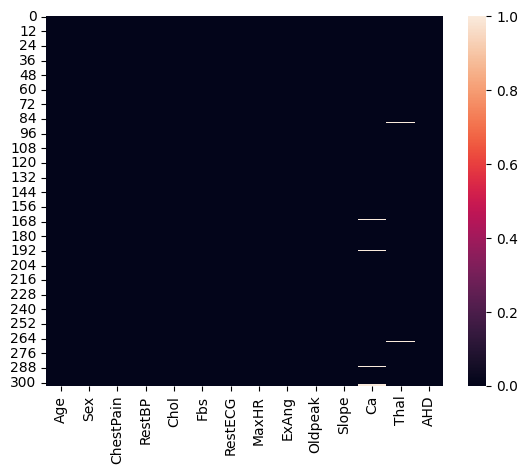

In [86]:
sns.heatmap(data.isnull())

In [87]:
data.duplicated().sum()

0

**Find Row With Null Value**

In [88]:
nan_ca_rows = data[data['Ca'].isnull()]
nan_ca_rows

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
166,52,1,nonanginal,138,223,0,0,169,0,0.0,1,NaN,normal,No
192,43,1,asymptomatic,132,247,1,2,143,1,0.1,2,NaN,reversable,Yes
287,58,1,nontypical,125,220,0,0,144,0,0.4,2,NaN,reversable,No
302,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [89]:
nan_thai_rows = data[data['Thal'].isnull()]
nan_thai_rows

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
87,53,0,nonanginal,128,216,0,2,115,0,0.0,1,0.0,NaN,No
266,52,1,asymptomatic,128,204,1,0,156,1,1.0,2,0.0,NaN,Yes


**Deal With Null Value**

In [90]:
# Remove the nan and fill with median
data['Ca']= data['Ca'].fillna(data['Ca'].median())

# Remove the nan and fill with values
data['Thal']= data['Thal'].replace(np.nan,'value',regex = True)

In [91]:
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

**Deal with Duplicated Value**

In [92]:
# if ther is duplicates drop it
#data.drop_duplicates()

**Turn Target Value From String Into Num**

In [93]:
data['AHD'].value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

**No ==>> 0**


---


**Yes ==>> 1**

In [94]:
le = LabelEncoder()
label = le.fit_transform(data['AHD'])
label

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [95]:
data.drop("AHD", axis=1, inplace=True)
data["AHD"] = label
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,1
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,1
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,1
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,1


**checking the distribution of Target Varibale**


In [96]:
print(data['AHD'].value_counts())
print("*********")
print(data['AHD'].value_counts().index)
print("*********")
print(data['AHD'].value_counts().values)
print("*********")
print(data['AHD'].value_counts().values[0])


0    164
1    139
Name: AHD, dtype: int64
*********
Int64Index([0, 1], dtype='int64')
*********
[164 139]
*********
164


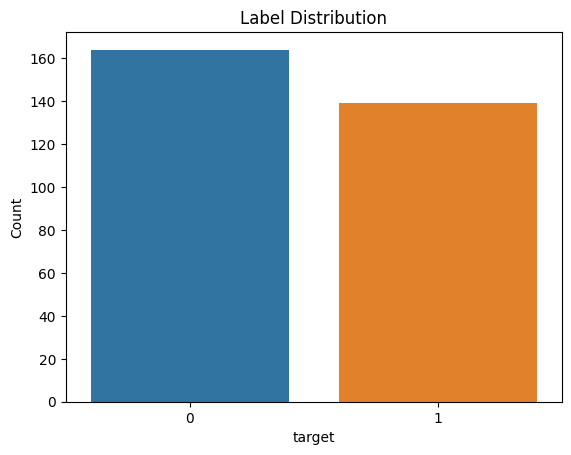

In [97]:
label_counts = data['AHD'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

In [98]:
data.AHD.value_counts()

0    164
1    139
Name: AHD, dtype: int64

In [99]:
dict(data.AHD.value_counts())

{0: 164, 1: 139}

In [100]:
dict(data.AHD.value_counts())[0]

164

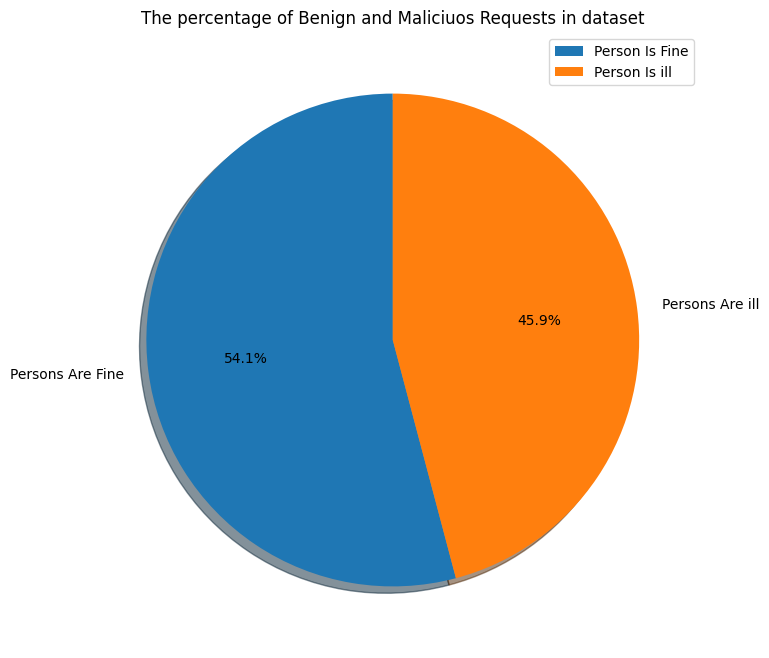

In [101]:
# New, error corrected
labels = ["Persons Are Fine",'Persons Are ill']
sizes = [data['AHD'].value_counts().values[0], data['AHD'].value_counts().values[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.legend(["Person Is Fine", "Person Is ill"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

# Analysis

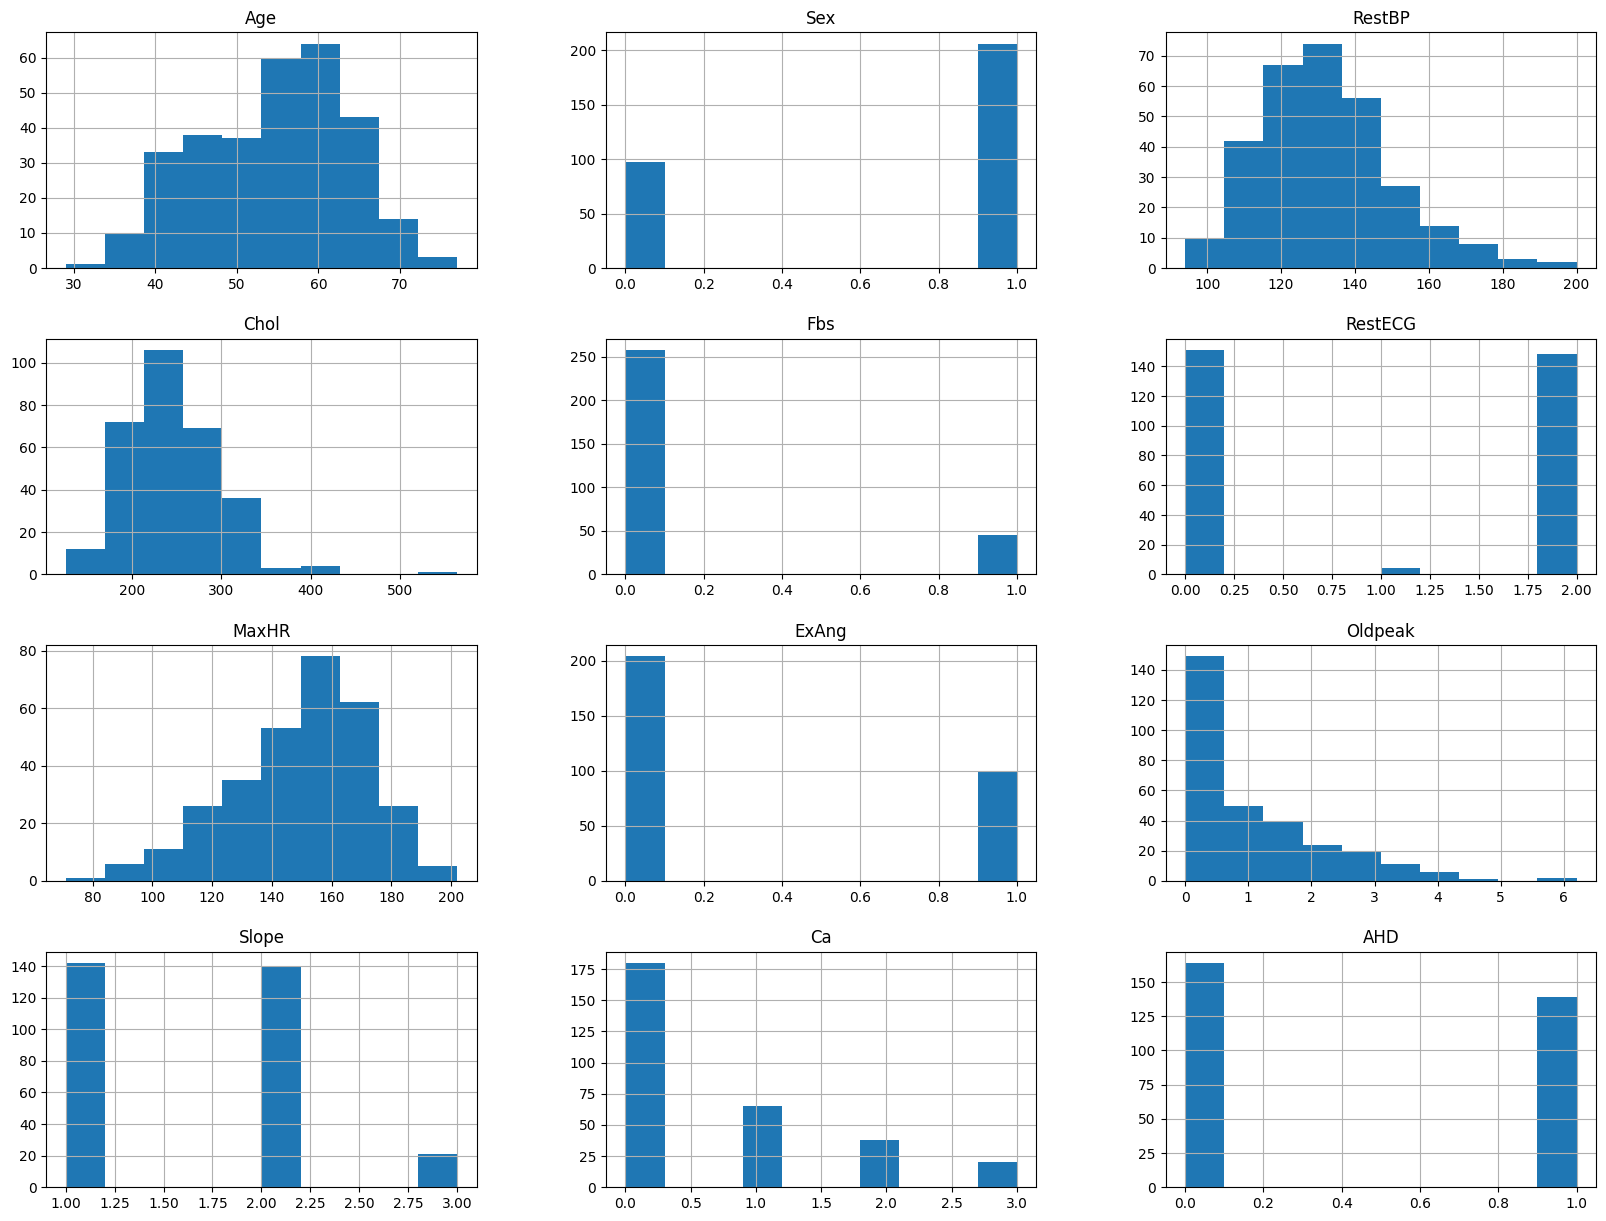

In [102]:
data.hist(figsize=(20,15))
plt.show()

Note that heatmap(corr) done only on numerical col which = 12

---


corr.rank(axis="columns") mean make corr range 0:12(#of col) istead of range 0:1

---
annot=True mean show me corr num


<ipython-input-103-19861a2170cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

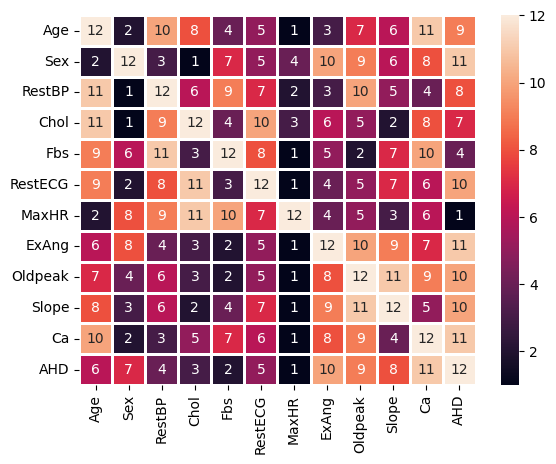

In [103]:
corr = data.corr()
sns.heatmap(corr.rank(axis="columns") , annot=True , linewidths=0.8 )

# PrePorcessing Data

**1 - Turn other object col From String Into Num** ----
**or you can drop these col**

In [104]:
obj = data.select_dtypes(include='object')
non_obj = data.select_dtypes(exclude='object')
print(obj.shape)  # 303row and 2col
obj

(303, 2)


,ChestPain,Thal
0,typical,fixed
1,asymptomatic,normal
2,asymptomatic,reversable
3,nonanginal,normal
4,nontypical,normal
...,...,...
298,typical,reversable
299,asymptomatic,reversable
300,asymptomatic,reversable
301,nontypical,normal


In [105]:
#in case delete
new_data = data.drop(columns =['ChestPain', 'Thal'])

In [106]:
# for i in range(0,obj.shape[1]):
#   obj.iloc[: , i]=le.fit_transform(obj.iloc[: , i])

In [107]:
# new_data = pd.concat([obj,non_obj] , axis=1)
# new_data

**2 -Separating the features and target**

In [108]:
X = new_data.drop(columns='AHD', axis=1)
Y = new_data['AHD']
print(X.shape)
print(Y.shape)
X.head(1)

(303, 11)
(303,)


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,63,1,145,233,1,2,150,0,2.3,3,0.0


**3 - Normalize Feature**

In [109]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X[0]

array([ 0.94872647,  0.68620244,  0.75752504, -0.2649003 ,  2.394438  ,
        1.01668424,  0.01719733, -0.69663055,  1.08733806,  2.27457861,
       -0.71113139])

**4 - Split Data**

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Model

**1 - Building the Neural Network**

In [125]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X.shape[1],)),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [126]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [127]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)


Epoch 1/10
7/7 [==============================] - 2s 60ms/step - loss: 0.7013 - accuracy: 0.5023 - val_loss: 0.7249 - val_accuracy: 0.4000
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 0.6677 - accuracy: 0.5392 - val_loss: 0.7016 - val_accuracy: 0.4800
Epoch 3/10
7/7 [==============================] - 0s 7ms/step - loss: 0.6441 - accuracy: 0.6083 - val_loss: 0.6833 - val_accuracy: 0.6000
Epoch 4/10
7/7 [==============================] - 0s 7ms/step - loss: 0.6253 - accuracy: 0.6544 - val_loss: 0.6673 - val_accuracy: 0.6400
Epoch 5/10
7/7 [==============================] - 0s 7ms/step - loss: 0.6081 - accuracy: 0.7327 - val_loss: 0.6517 - val_accuracy: 0.6800
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5895 - accuracy: 0.7604 - val_loss: 0.6380 - val_accuracy: 0.7200
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5705 - accuracy: 0.7696 - val_loss: 0.6240 - val_accuracy: 0.7200
Epoch 8/10
7/7 [================

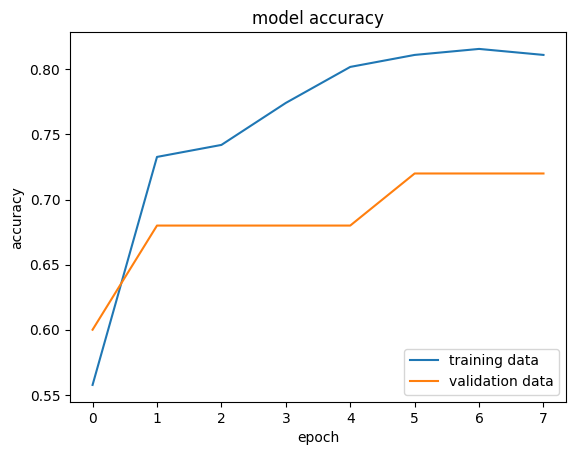

In [114]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

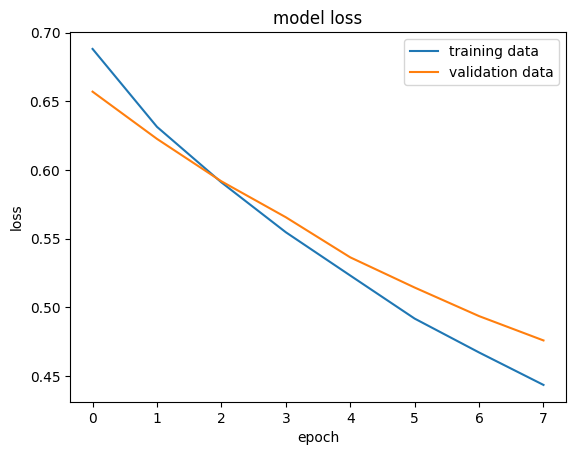

In [115]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')


**2 - Evaluate Model**

In [116]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)
print(loss)

2/2 [==============================] - 0s 16ms/step - loss: 0.4420 - accuracy: 0.8033
0.8032786846160889
0.442049115896225


In [117]:
Y_pred = model.predict(X_test)
print(Y_pred[0])


2/2 [==============================] - 0s 13ms/step
[0.20851699]


2/2 [==============================] - 0s 8ms/step


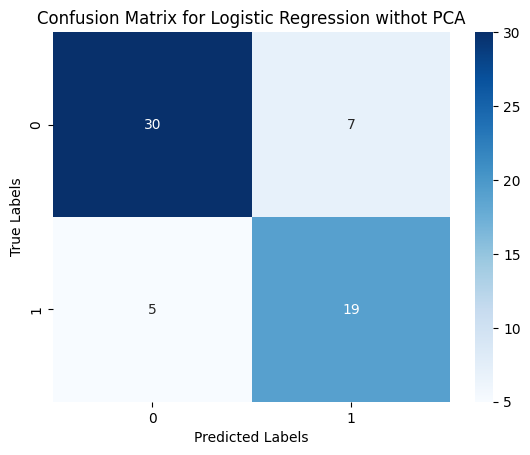

In [118]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,np.round(model.predict(X_test),0))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression withot PCA')
plt.show()

# Make Predictive Model

**1 - Display random rows From Standard X**


In [119]:
np.random.shuffle(X)
print("\nRandom row:")
rows = X[:1, :]
print(rows)


Random row:
[[-0.04864326  0.68620244  0.47296009 -0.14882685 -0.41763453 -0.99674925
   0.45507891 -0.69663055  0.13837295 -0.97635214 -0.71113139]]


**2 - Predict Label For This random row**

In [120]:
input_data = rows
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) #mean only 1 row and -1 mean count num of coulum and put it instead it this mean (1,60)

#prediction = np.argmax(model.predict(input_data_reshaped), axis=1) #case if target more than 2 option
prediction = np.round(model.predict(input_data_reshaped),0)
print(prediction)

1/1 [==============================] - 0s 31ms/step
[[0.]]


In [121]:
if (prediction[0]== 1):
  print('You Are Ill')
else:
  print('You Are Fine')

You Are Fine


# Some Comment For Me

In [122]:
# # if you want to ensure try this code
# print("\n row:")
# rows = X[6:7, :]
# target = Y[6]
# print(rows)
# print(target)

In [123]:
#prediction = np.argmax(model.predict(input_data_reshaped), axis=1) #case if target more than 2 option


In [124]:
# test = new_data.sample(1).values
# test[:,:-1]